# Optimization

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [6]:
from scipy.optimize import minimize

In [7]:
def f(x):
    return (x-3)**2

res = minimize(f,2)

In [8]:
res.x

array([2.99999999])

In [14]:
f = lambda x: (x[0] - 1)**2 + (x[1]-2.5)**2
# constraints
cons = ({'type':'ineq','fun':lambda x:x[0]-2*x[1]+2},
        {'type':'ineq','fun': lambda x:-x[0]-2*x[1]+6},
        {'type':'ineq','fun': lambda x:-x[0]+x[1]+2})

bnds = ((0,None),(0,None))
res = minimize(f,(2,0),bounds = bnds,constraints = cons)

In [15]:
res.x

array([1.4, 1.7])

In [16]:
minimize? # help 

# Interpolation

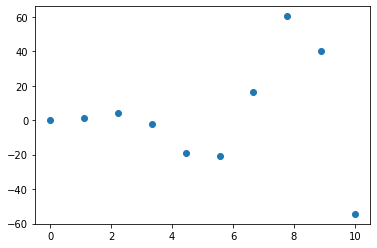

In [18]:
x = np.linspace(0,10,10)
y = x**2 * np.sin(x)
plt.scatter(x,y)

In [27]:
from scipy.interpolate import interp1d

In [36]:
f = interp1d(x,y,kind = 'linear')
x_dense = np.linspace(0,10,100)
y_dense = f(x_dense)

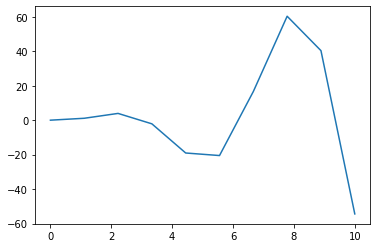

In [37]:
plt.plot(x_dense,y_dense)

# Curve Fitting

In [38]:
x_data = np.linspace(0,10,10)
y_data = 3*x_data**2 + 2

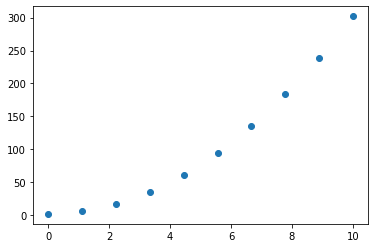

In [39]:
plt.scatter(x_data,y_data)

In [44]:
from scipy.optimize import curve_fit
def func(x,a,b):
    return a*x**2 +b

popt, pcov = curve_fit(func,x_data,y_data,p0=(1,1))

In [45]:
popt

array([3., 2.])

# Speical Functions

In [46]:
from scipy.special import legendre

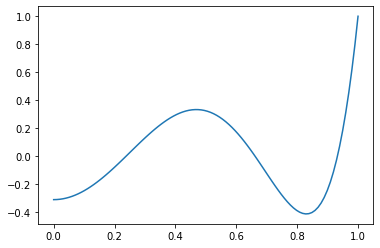

In [48]:
x = np.linspace(0,1,100)
plt.plot(x,legendre(6)(x))
plt.show()

In [52]:
from scipy.special import jv

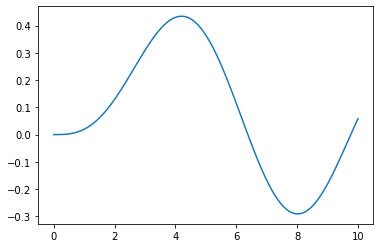

In [54]:
x = np.linspace(0,10,100)
plt.plot(x,jv(3,x))
plt.show()

# Differentiation

In [55]:
from scipy.misc import derivative

In [58]:
def f(x):
    return x**2 * np.sin(2*x) * np.exp(-x)

x = np.linspace(0,1,100)

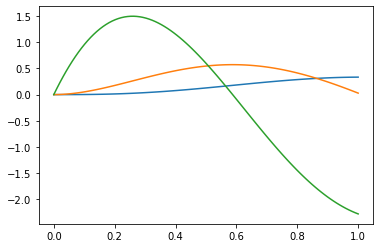

In [65]:
plt.plot(x,f(x))
plt.plot(x,derivative(f,x,dx = 1e-6))
plt.plot(x,derivative(f,x,dx = 1e-6,n=2)) # higher order derivatives

# Integration

$$\int_0^1 x^2 \sin(2x) e^{-x}dx$$

In [66]:
from scipy.integrate import quad

In [67]:
integrand = lambda x: x**2 *np.sin(x) * np.exp(-x)
integral, integral_error = quad(integrand,0,1)

$$\int_0^1\int_{-x}^{x^2} \sin(x+y^2)dydx$$

In [70]:
from scipy.integrate import dblquad

In [71]:
integrand = lambda x, y:np.sin(x+y**2)
#upper and lower bound are both functions
lwr_y = lambda x:-x
upr_y = lambda x:x**2
integral, integral_error = dblquad(integrand,0,1,lwr_y,upr_y)

# Differential Equations

Air friction while falling

$$v'-\alpha v^2+\beta = 0, v(0)=0$$

In [74]:
from scipy.integrate import odeint

All the information about ODE

In [76]:
def dvdt(v,t):
    #set parameters as 3 and 5
    return 3*v**2 - 5
v0 = 0

In [77]:
#solve the ODE
t = np.linspace(0,1,100)
sol = odeint(dvdt,v0,t)

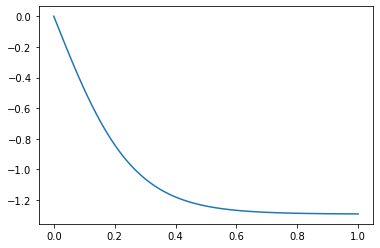

In [83]:
plt.plot(t,sol.T[0])

$$y_1'=y_1+y_2^2+3x,y_1(0)=0$$
$$y_2'=3y_1+y_2^3-\cos(x),y_2(0)=0$$

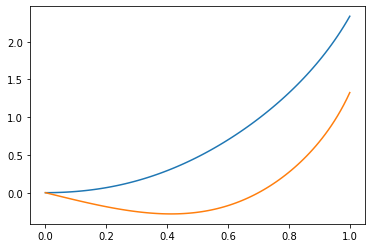

In [93]:
def dSdx(S,x):
    y1, y2 = S
    return [y1+y2**2+3*x,3*y1+y2**3-np.cos(x)]

y1_0=0
y2_0=0
S_0 = (y1_0,y2_0)
x = np.linspace(0,1,100)
sol = odeint(dSdx,S_0,x)
y1 = sol.T[0]
y2 = sol.T[1]
plt.plot(x,y1)
plt.plot(x,y2)

# Linear Algebra

In [95]:
from scipy.linalg import solve_triangular
a = np.array([[3,0,0,0],
              [2,1,0,0],
              [1,0,1,0],
              [1,1,1,1]])
b = np.array([4,2,4,2])
x =solve_triangular(a,b,lower = True)
x

array([ 1.33333333, -0.66666667,  2.66666667, -1.33333333])

# Eigenvalue Problem

In [96]:
from scipy.linalg import eigh_tridiagonal

In [97]:
d = 3*np.ones(4)
e = -1*np.ones(3)
w,v = eigh_tridiagonal(d,e)

In [99]:
v.T

array([[ 0.37174803,  0.60150096,  0.60150096,  0.37174803],
       [ 0.60150096,  0.37174803, -0.37174803, -0.60150096],
       [ 0.60150096, -0.37174803, -0.37174803,  0.60150096],
       [ 0.37174803, -0.60150096,  0.60150096, -0.37174803]])

In [100]:
A = np.diag(d) + np.diag(e,k=1)+np.diag(e,k=-1)

In [105]:
A@v.T[1]

array([ 1.43275483,  0.88549118, -0.88549118, -1.43275483])

In [106]:
w[1]*v.T[1]

array([ 1.43275483,  0.88549118, -0.88549118, -1.43275483])